In [135]:
import pickle
from gensim.models import word2vec
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import pickle
import requests
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from scipy.spatial.distance import cosine
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from chembl_webresource_client.new_client import new_client
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Reshape, GRU, SpatialDropout1D, LSTM, Dropout
from keras.layers import BatchNormalization, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [8]:
with open("mol_sentences.pkl", "rb") as file:
    sentences = pickle.load(file)

In [11]:
model = word2vec.Word2Vec.load('./model_300dim.pkl')

In [23]:
vectors = []

for sentence in sentences:
    vector = []
    for word in sentence[3]:
        try:
            vector+=list(model.wv.word_vec(word))
        except:
            vector+=([0 for a in range(0, 300)])
    vectors.append(vector)
    
vectors = np.asarray(vectors)

In [36]:
sum_vectors = []

for vector in vectors:
    arr = np.asarray(vector)
    arr = arr.reshape((int(arr.shape[0]/300), 300) )
    sum_vectors.append(arr.sum(axis=0))

sum_vectors = np.asarray(sum_vectors)

In [75]:
atc = [a[1][0] for a in sentences]
le = LabelEncoder()
le.fit(atc)

atc = le.transform(atc)

In [138]:
X = sum_vectors
y = atc

atc_counter = Counter(y)
top_atc = [a for a, _ in atc_counter.most_common(4)]

temp_x = []
temp_y = []

for i in range(y.shape[0]):
    if y[i] in top_atc:
        temp_x.append(X[i])
        temp_y.append(y[i])
        
X = np.asarray(temp_x)
y = np.asarray(temp_y)

atc_labels = le.inverse_transform(np.unique(y))

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(random.random()*100))

In [140]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [141]:
def accuracy(y_true, y_pred, atc_labels):
    print("Overall Accuracy:", np.sum(np.equal(y_true, y_pred))/y_true.shape[0])
    matrix = confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix, annot=True,cbar=False, xticklabels=atc_labels, yticklabels=atc_labels)

Overall Accuracy: 0.682352941176
             precision    recall  f1-score   support

          0       0.59      0.54      0.57        96
          2       0.45      0.57      0.51        77
          6       0.80      0.90      0.85        81
          9       0.81      0.71      0.76       171

avg / total       0.70      0.68      0.69       425



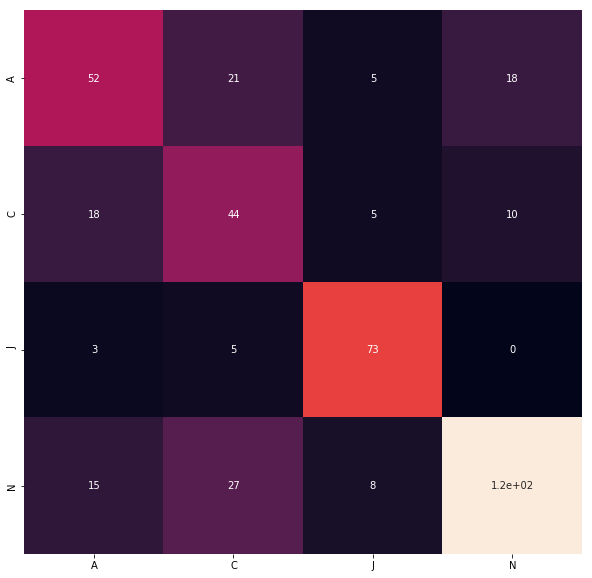

In [142]:
y_pred = neigh.predict(X_test)
accuracy(y_pred, y_test, atc_labels)